# Introduction

In this notebook, we will learn about evaluation metrics and different techniques to optimised Machine Learning models.

## Table of Content

- [0. Packages](#0)
- [1. Evaluation Metrics](#1)
    - [1.1 Regression Metrics](#1.1)
        - [Mean Absolute Error (MAE)](#1.1.1)
        - [Mean Squared Error (MSE)](#1.1.2)
        - [Root Mean Squared Error (RMSE)](#1.1.3)
    - [1.2 Classification Metrics](#1.2)
        - [True Positives, True Negatives, False Positives, False Negatives](#1.2.1)
        - [Accuracy, Recall & Precision](#1.2.2)
        - [Confusion Matrix](#1.2.3)
        - [AUC and ROC curves](#1.2.4)
- [2. Hyperparameter Optimisation](#2)
- [3. Cross Validation](#3)

# 0. Packages <a name="0"></a>

In this session, we will make use of the following packages:
- [numpy](https://docs.scipy.org/doc/numpy/) is a popular library for scientific computing.
- [matplotlib](https://matplotlib.org/3.1.1/contents.html) is a plotting library compatible with numpy.
- [pandas](https://pandas.pydata.org/docs/) is what we'll use to manipulate our data.
- [sklearn](https://scikit-learn.org/stable/index.html) will be used to measure the performance of our model.

Run the next cell to import the necessary packages mentioned before. Besides, we will add more packages as needed while progressing in this session.

In [1]:
# Good practice to use short but clear aliases for the imported libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
# Magic Function
%matplotlib inline
# Hide all warnings
import warnings
warnings.filterwarnings('ignore') # warnings.filterwarnings(action='once')

# 1. Evaluation Metrics and Scoring <a name="1"></a>

In Machine Learning (ML), evaluating the trained models is one of the most important task in the model creation cycle. 

A typical workflow for supervised learning looks like this:

- 1. Select a model with an initial configuration, train the model and then predict on unseem data (Test Dataset a.k.a `X_test` and `y_test`).
- 2. Compare the target `y_test` with the results from `y_predicted`. Then measure the performance using an evaluation metrics.
- 3. The hyperparameters of the models are finetuned to reach the optimal for the evaluation metric.


Important to know:

- Evaluating a model is an important step to build effective ML models.
- There are many different evaluation metrics with some pro's and con's. Some popular metrics are `Accuracy`, `Confusion Matrix`, `AUC and ROC Curves`, and `Mean Squared Error`. 
- Depending on the ML task, there are different metrics for different ML tasks. For example, `Mean Squared Error` is usually used for regression problems, where as `Confusion Matrix` for classification. 


In supervised learning, we can perform `classification` and `regression` tasks. In a nutshell, the tasks of `classification` corresponds to the task of assigning classes or labels to the sampled data. For example, the problem of classifiying images of handwritting digits from 0 to 9 will have 10 classes. On the other hand, regression, tries to predict continous values. For example, predicting the price of a house given the neighborhood, number of rooms, etc. (Example: [Kaggle Dataset](https://www.kaggle.com/c/house-prices-advanced-regression-techniques))

In this section, we will focus on `classification` and `regression` metrics.


<a name='1-1'></a>
## 1.1 Regression Metrics

To evaluate the performance on regression problems, we will use metrics that meausure the distance between the target values and the predictions made by our model. It is common to hear that a regression metric is called `loss` or `error` functions. Depending on the context, some loss functions are refered with different names. For example, Mean Absolute Error is often called `L1 loss` or `Manhattan distance` in academic papers.

In a regression problem, the objective is to minimize the error, cost or loss function.

For the regression examples, suppose that we already trained a model and we got `y` and the predictions for `y_pred`:

In [2]:
# Set a seed for random numbers
np.random.seed(2020)
# Generate random numbers 
y = np.random.uniform(low=0.0, high=100.0, size=(10,))
y

array([98.62768289, 87.33919458, 50.9745525 , 27.18357143, 33.69187277,
       21.6954265 , 27.64771432, 34.33155928, 86.21589355, 15.669967  ])

In [3]:
# Predictions
y_pred = np.array([90,85,45,34,33,22,28,33,89,16])
y_pred

array([90, 85, 45, 34, 33, 22, 28, 33, 89, 16])

<a name='1-1-1'></a>
## Mean Absolute Error (L1 loss)

According to [wikipedia](https://en.wikipedia.org/wiki/Mean_absolute_error):

> In statistics, mean absolute error (MAE) is a measure of errors between paired observations expressing the same phenomenon. Examples of Y versus X include comparisons of predicted versus observed, subsequent time versus initial time, and one technique of measurement versus an alternative technique of measurement. MAE is calculated as:


$\text{MAE}(y, \hat{y}) = \frac{1}{n_{\text{samples}}} \sum_{i=0}^{n_{\text{samples}}-1} \left| y_i - \hat{y}_i \right|$

Let's break the equation:

- $\frac{1}{n_{\text{samples}}}$: Divide everything by the total number of data points.
- $y$: Target output values
- $\hat{y}$: Predicted output values
- $\sum_{i=0}^{n_{\text{samples}}-1} \left| y_i - \hat{y}_i \right|$: Sum of the absolute value of the difference between $y$ and $\hat{y}$

In [4]:
# Let's implement MAE using numpy
def MAE(y, y_pred):   
    n_samples = len(y)
    mean_abs_err = np.sum(np.abs(y-y_pred))/n_samples
    return mean_abs_err

print(MAE(y,y_pred))

2.9552289225711506


In [5]:
# Scikit-learn has an implementation for MAE

# Let's import it first
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y,y_pred)

2.9552289225711506

<a name='1-1-2'></a>
## Mean Squared Error (L2 loss, also called Euclidean Distance)

Mean Squared Error is probably one of the most popular and used metrics for regression tasks. As it squares the differences, it penalizes more large errors. Being a differentiable function, it can be optimised better.

$\text{MSE}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples} - 1} (y_i - \hat{y}_i)^2$


In [6]:
# Let's implement MSE using numpy
def MSE(y, y_pred):   
    n_samples = len(y)
    mean_sq_err = np.sum((y-y_pred)**2)/n_samples
    return mean_sq_err

print(MSE(y,y_pred))

17.239649808666712


In [7]:
# Scikit-learn has an implementation for MSE as well
# Let's import it first
from sklearn.metrics import mean_squared_error

mean_squared_error(y,y_pred)

17.239649808666712

## Root Mean Squared Error (RMSE)

$\text{RMSE}(y, \hat{y}) = \sqrt{\frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples} - 1} (y_i - \hat{y}_i)^2}$


In [8]:
# Let's implement MAE using numpy
def RMSE(y, y_pred):   
    n_samples = len(y)
    mean_abs_err = np.sqrt(np.sum((y-y_pred)**2)/n_samples)
    return mean_abs_err

print(RMSE(y,y_pred))

4.152065727883738


In [9]:
# Scikit-learn has an implementation for MSE as well
# Let's import it first MSE
from sklearn.metrics import mean_squared_error

# We could do something like this for this implementation
np.sqrt(mean_squared_error(y,y_pred))

4.152065727883738

There are many implementations of regression metrics in Scikit-learn. Each metric has its advantages and drawbacks.

For a completed list of metrics check the official API:
https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

<a name='1-2'></a>
### 1.2 Classification Metrics
<a name='1-2-1'></a>
### True Positives, False Positives, True Negatives, and False Negatives

The most basic statistics to compute from the model predictions are the true positives, true negatives, false positives and false negatives:

- true positive (TP): The model classifies the example as positive, and the actual label also positive.
- false positive (FP): The model classifies the example as positive, **but** the actual label is negative.
- true negative (TN): The model classifies the example as negative, and the actual label is also negative.
- false negative (FN): The model classifies the example as negative, **but** the label is actually positive.

We will count the number of TP, FP, TN and FN in the given data.  All of our metrics can be built off of these four statistics. 

Recall that the model outputs real numbers between 0 and 1.
* To compute binary class predictions, we need to convert these to either 0 or 1. 
* We'll do this using a threshold value $th$.
* Any model outputs above $th$ are set to 1, and below $th$ are set to 0. 

All of the metrics studies in this section (except for ROC-AUC Curves) will depend on the choice of this threshold. 
<a name='ex-1'></a>
### Exercise 1

The first two metrics, `TP` and `FP` are implemented below. Based on that code, create two more functions for `TN` and `TP`.

In [10]:
# Let's set the threshold as 0.5 by default
def true_positives(y, pred, th=0.5):
    TP = 0
    # get thresholded predictions
    th_preds = (pred > th).astype(int) # astype(int) converts an array of booleans to integers
    # compute True Positives. Use numpy to calculate TP  
    TP = np.sum((y == 1) & (th_preds == 1))
    return TP

def true_negatives(y, pred, th=0.5):
    TN = 0
    # get thresholded predictions
    th_preds = (pred > th).astype(int) # astype(int) converts an array of booleans to integers
    # compute True Negatives. Use numpy to calculate TN
    TN = np.sum((y == 0) & (th_preds == 0))
    return TN

def false_positives(y, pred, th=0.5):
    FP = 0
    # get thresholded predictions
    th_preds = pred > th
    # COMPLETE CODE HERE
    return FP

def false_negatives(y, pred, th=0.5):
    FN = 0
    # get thresholded predictions
    th_preds = pred > th
    # COMPLETE CODE HERE
    return FN

You can click in the button below the reveal the solution for exercise 1

<details>    
<summary>
    <font size="4" color="darkblue"><b>See the solution for Exercise 1</b></font>
</summary>
    
```python
    def false_positives(y, pred, th=0.5):
        FP = 0
        # get thresholded predictions
        th_preds = (pred > th).astype(int)
        # compute FP
        FP = np.sum(((y == 0) & (th_preds == 1)).astype(int))
        return FP

    def false_negatives(y, pred, th=0.5):
        FN = 0
        # get thresholded predictions
        th_preds = (pred > th).astype(int)
        FN = np.sum(((y == 1) & (th_preds == 0)).astype(int))
        return FN
 ```
</details>


## <a name='1-2-2'></a>
## Accuracy, Precision, Recall

From the basic statistics we can calculate metrics such as accuracy, precision and recall.

A few definitions from Wikipedia below:

- **Accuracy**: Accuracy is the closeness of the measurements to a specific value (Source: [Wikipedia](https://en.wikipedia.org/wiki/Accuracy_and_precision)). 

$\displaystyle \mathrm {ACC} ={\frac {\mathrm {TP} +\mathrm {TN} }{\mathrm {TP} +\mathrm {TN} +\mathrm {FP} +\mathrm {FN} }}$

Accuracy is one of the most popular metrics for classification. However, accuracy alone might not be the best metric to benchmark the performance of a ML model.


In the following scenario, imagine that you trained an ML binary classification model and you got $y$ and $\hat{y}$ like this. You also want calculate a threshold of 0,5:

**Model 1:**

<table>
<tr><th>Original </th><th>With Threshold 0,5</th></tr>
<tr><td>
    
| $y$ | $\hat{y}$ |
| :-: | :-: | 
| 0 | 0,2 |
| 1 | 0,6 |
| 0 | 0,44 |
| 1 | 0,8 |
| 1 | 0,75 |
| 0 | 0,55 |
| 0 | 0,25 |
| 1 | 0,67 |
| 1 | 0,32 |
| 1 | 0,15 |
    
</td><td>
    
| $y$ | $\hat{y}$ |
| :-: | :-: | 
| 0 | 0 |
| 1 | 1 |
| 0 | 0 |
| 1 | 1 |
| 1 | 1 |
| 0 | 1 |
| 0 | 0 |
| 1 | 1 |
| 1 | 0 |
| 1 | 0 |

</td></tr></table>

From those results, let's calculate TP, TN, FP, FN:

<details>    
<summary>
    <font size="4" color="darkgreen"><b>Help...</b></font>
</summary>
    
```python
    TP = np.sum(((y == 1) & (th_preds == 1)).astype(int))
    TN = np.sum(((y == 0) & (th_preds == 0)).astype(int))
    FP = np.sum(((y == 0) & (th_preds == 1)).astype(int))
    FN = np.sum(((y == 1) & (th_preds == 0)).astype(int))
 ```
</details>

- $\mathrm{TP = 4}$
- $\mathrm{TN = 3}$
- $\mathrm{FP = 1}$
- $\mathrm{FN = 2}$

To calculate accuracy:

$\displaystyle \mathrm {ACC} ={\frac {\mathrm {TP} +\mathrm {TN} }{\mathrm {TP} +\mathrm {TN} +\mathrm {FP} +\mathrm {FN} }}$


So in our case:

$\displaystyle \mathrm {ACC} ={\frac {\mathrm {4} +\mathrm {3} }{\mathrm {4} +\mathrm {3} +\mathrm {1} +\mathrm {2} }} = {\frac{7}{10}} = 0,7 $

So we got an accuracy of 0,7. No bad right? Now let's compare with the next example:

<a name='ex-2'></a>
### Exercise 2

Imagine that you have trained another ML algorithm and you get the results below:
1. Calculate results with a threshold of 0,5
2. Calculate TP, TN, FP, FN
3. Calculate accuracy

**Model 2:**


<table>
<tr><th>Original </th><th>With Threshold 0,5</th></tr>
<tr><td>
    
| $y$ | $\hat{y}$ |
| :-: | :-: |
| 0 | 0,01 |
| 0 | 0,01 |
| 1 | 0,01 |
| 1 | 0,01 |
| 0 | 0,01 |
| 0 | 0,01 |
| 0 | 0,01 |
| 0 | 0,01 |
| 0 | 0,01 |
| 0 | 0,01 |
    
</td><td>
    
| $y$ | $\hat{y}$ |
| :-: | :-: |
| 0 | 0 |
| 0 | 0 |
| 1 | 0 |
| 1 | 0 |
| 0 | 0 |
| 0 | 0 |
| 0 | 0 |
| 0 | 0 |
| 0 | 0 |
| 0 | 0 |

</td></tr></table>

You can click in the button below the reveal the solution for exercise 2

<details>    
<summary>
    <font size="4" color="darkblue"><b>See the solution for Exercise 2</b></font>
</summary>


<table>
<tr><th>Original </th><th>With Threshold 0,5</th><th>Results</th></tr>
<tr><td>
    
| $y$ | $\hat{y}$ |
| :-: | :-: |
| 0 | 0,01 |
| 0 | 0,01 |
| 1 | 0,01 |
| 1 | 0,01 |
| 0 | 0,01 |
| 0 | 0,01 |
| 0 | 0,01 |
| 0 | 0,01 |
| 0 | 0,01 |
| 0 | 0,01 |
    
</td><td>
    
| $y$ | $\hat{y}$ |
| :-: | :-: | 
| 0 | 0 |
| 0 | 0 |
| 1 | 0 |
| 1 | 0 |
| 0 | 0 |
| 0 | 0 |
| 0 | 0 |
| 0 | 0 |
| 0 | 0 |
| 0 | 0 |

</td><td>
    
- $TP=0$
- $TN=8$
- $FP=0$
- $FN=2$    
    
    
$\displaystyle \mathrm {ACC} ={\frac {\mathrm {0} +\mathrm {8} }{\mathrm {0} +\mathrm {8} +\mathrm {0} +\mathrm {2} }} = {\frac{8}{10}} = 0,8 $
    
</td></tr> </table>
    
**IMPORTANT (READ THIS):** <br/>
So our accuracy is 80% now ! Does this mean that our second model is better?
    
Actually, our first intuition would tell us that the first model is better, even if we are getting a better accuracy from the second model. Why is that?
    
If we check the results for the second model, we will notice that the second model always predicts 0.01. This is not a very useful model and that's why we should not rely only in the accuracy metric.
</details>

Let's talk now about recall and precision.

Some few definitions from Wikipedia below:

- **recall**: measures the proportion of actual positives that are correctly identified as such (Source: [Wikipedia](https://en.wikipedia.org/wiki/Sensitivity_and_specificity)). <br/>
$\displaystyle \mathrm {Recall} ={\frac {\mathrm {TP} }{\mathrm {TP} +\mathrm {FN}}}$

- **precision**: are the proportions of positive results that are true positives (Source: [Wikipedia](https://en.wikipedia.org/wiki/Accuracy_and_precision)).  <br/>
$\displaystyle \mathrm {Precision} ={\frac {\mathrm {TP} }{\mathrm {TP} +\mathrm {FP}}}$


From the last exercise we had:

- $TP=0$
- $TN=8$
- $FP=0$
- $FN=2$    
    
$\displaystyle \mathrm {ACC} ={\frac {\mathrm {0} +\mathrm {8} }{\mathrm {0} +\mathrm {8} +\mathrm {0} +\mathrm {2} }} = {\frac{8}{10}} = 0,8 $

Now, let's calculate the Recall and Precision for the same example:

$\displaystyle \mathrm {Recall} ={\frac {\mathrm {TP} }{\mathrm {TP} +\mathrm {FN}}}={\frac {\mathrm {0}}{\mathrm {0} +\mathrm {2}}}=0$
    
$\displaystyle \mathrm {Precision} ={\frac {\mathrm {TP} }{\mathrm {TP} +\mathrm {FP}}}={\frac {\mathrm {0} }{\mathrm {0} +\mathrm {0}}}=$Error (Do not divide by zero)

**Note:** We can modify the formula and add a small value $\epsilon$ to avoid problems of division by zero.
Then, the new formula could be:

$\displaystyle \mathrm {Precision} ={\frac {\mathrm {TP} }{\mathrm {TP} +\mathrm {FP} + \epsilon}}$

where $\epsilon$ is equal to small number such as 0,000001

Then:

$\displaystyle \mathrm {Precision} ={\frac {\mathrm {TP} }{\mathrm {TP} +\mathrm {FP} + \epsilon}}={\frac {\mathrm {0} }{\mathrm {0} +\mathrm {0} + 0,000001}}=0$


### Exercise 3

We already calculated the `precision` and `recall` for the second model of our example. We noticed that in both cases we got a value of zero. Despite of having an accuracy of 80%, a precision and recall of 0 is very suspicious. This would usually mean that there is something wrong either with our model or the test data set we are using to evaluate.

- Calculate the precision and recall for the first model
- Compare how those accuracy, precision and recall differ between model 1 and model 2 

Model 1:
<table>
<tr><th>Original </th><th>With Threshold 0,5</th></tr>
<tr><td>
    
| $y$ | $\hat{y}$ |
| :-: | :-: | 
| 0 | 0,2 |
| 1 | 0,6 |
| 0 | 0,44 |
| 1 | 0,8 |
| 1 | 0,75 |
| 0 | 0,55 |
| 0 | 0,25 |
| 1 | 0,67 |
| 1 | 0,32 |
| 1 | 0,15 |
    
</td><td>
    
| $y$ | $\hat{y}$ |
| :-: | :-: | 
| 0 | 0 |
| 1 | 1 |
| 0 | 0 |
| 1 | 1 |
| 1 | 1 |
| 0 | 1 |
| 0 | 0 |
| 1 | 1 |
| 1 | 0 |
| 1 | 0 |

</td></tr></table>

Model 2:
<table>
<tr><th>Original </th><th>With Threshold 0,5</th></tr>
<tr><td>
    
| $y$ | $\hat{y}$ |
| :-: | :-: |
| 0 | 0,01 |
| 0 | 0,01 |
| 1 | 0,01 |
| 1 | 0,01 |
| 0 | 0,01 |
| 0 | 0,01 |
| 0 | 0,01 |
| 0 | 0,01 |
| 0 | 0,01 |
| 0 | 0,01 |
    
</td><td>
    
| $y$ | $\hat{y}$ |
| :-: | :-: |
| 0 | 0 |
| 0 | 0 |
| 1 | 0 |
| 1 | 0 |
| 0 | 0 |
| 0 | 0 |
| 0 | 0 |
| 0 | 0 |
| 0 | 0 |
| 0 | 0 |

</td></tr></table>

You can click in the button below the reveal the solution for exercise 1
<details>    
<summary>
    <font size="4" color="darkblue"><b>See the solution for Exercise 3</b></font>
</summary>
    
**Model 1:**
    
- $\mathrm{TP = 4}$
- $\mathrm{TN = 3}$
- $\mathrm{FP = 1}$
- $\mathrm{FN = 2}$

$\displaystyle \mathrm {ACC} ={\frac {\mathrm {4} +\mathrm {3} }{\mathrm {4} +\mathrm {3} +\mathrm {1} +\mathrm {2} }} = {\frac{7}{10}} = 0,7 $
    
$\displaystyle \mathrm {Recall} ={\frac {\mathrm {TP} }{\mathrm {TP} +\mathrm {FN}}}={\frac {\mathrm {4}}{\mathrm {4} +\mathrm {2}}}=\frac {\mathrm {4}}{\mathrm {6}} = 0.67$
    
$\displaystyle \mathrm {Precision} ={\frac {\mathrm {TP}}{\mathrm {TP} +\mathrm {FP}}}={\frac{\mathrm {4}}{\mathrm {4} +\mathrm {1}}}=\frac {\mathrm {4}}{\mathrm {5}} = 0.8$
    
**Model 2:**
    
- $\mathrm{TP = 0}$
- $\mathrm{TN = 8}$
- $\mathrm{FP = 0}$
- $\mathrm{FN = 2}$
    
$\displaystyle \mathrm {ACC} ={\frac {\mathrm {0} +\mathrm {8} }{\mathrm {0} +\mathrm {8} +\mathrm {0} +\mathrm {2} }} = {\frac{8}{10}} = 0,8 $
    
$\displaystyle \mathrm {Recall} ={\frac {\mathrm {TP} }{\mathrm {TP} +\mathrm {FN} +\epsilon}}={\frac {\mathrm {0}}{\mathrm {0} +\mathrm {2}+\epsilon}}=\frac {\mathrm {0}}{\mathrm {2}+\epsilon} = 0$
    
$\displaystyle \mathrm {Precision} ={\frac {\mathrm {TP}}{\mathrm {TP} +\mathrm {FP}+\epsilon}}={\frac{\mathrm {0}}{\mathrm {0} +\mathrm {1}+\epsilon}}=\frac {\mathrm {0}}{\mathrm {0}+\epsilon} = 0$
    
</details>   

### Metrics in Python
Let's implement the metrics for accuracy, recall, and precision in Python.

But first, let's check again the functions to calculate TP,TN,FP and FN

In [21]:
# If you implemented correctly the functions in exercise 1. It should look like this code below:
# Let's set the threshold as 0.5 by default
def true_positives(y, pred, th=0.5):
    TP = 0
    # get thresholded predictions
    th_preds = (pred > th).astype(int) # astype(int) will convert an array of booleans to integers
    # compute True Positives. Use numpy to calculate TP  
    TP = np.sum(((y == 1) & (th_preds == 1)).astype(int))
    return TP

def true_negatives(y, pred, th=0.5):
    TN = 0
    # get thresholded predictions
    th_preds = (pred > th).astype(int)
    # compute True Negatives. Use numpy to calculate TN
    TN = np.sum(((y == 0) & (th_preds == 0)).astype(int))
    return TN

def false_positives(y, pred, th=0.5):
    FP = 0
    # get thresholded predictions
    th_preds = (pred > th).astype(int)
    # compute FP
    FP = np.sum(((y == 0) & (th_preds == 1)).astype(int))
    return FP

def false_negatives(y, pred, th=0.5):
    FN = 0
    # get thresholded predictions
    th_preds = (pred > th).astype(int)
    FN = np.sum(((y == 1) & (th_preds == 0)).astype(int))
    return FN

Remember that the accuracy is defined by:

$\displaystyle \mathrm {ACC} ={\frac {\mathrm {TP} +\mathrm {TN} }{\mathrm {TP} +\mathrm {TN} +\mathrm {FP} +\mathrm {FN} }}$

In [41]:
# Implementation of Accuracy in Python
def Accuracy(y,y_hat):
    TP = true_positives(y,y_hat)
    TN = true_negatives(y,y_hat)
    FP = false_positives(y,y_hat)
    FN = false_negatives(y,y_hat)
    
    return (TP+TN)/(TP+TN+FP+FN)

# Exercise 4

Implement the metrics for precision and recall in Python

In [ ]:
# IMPLEMENT CODE HERE



<details>    
<summary>
    <font size="4" color="darkblue"><b>See the solution for Exercise 4</b></font>
</summary>
    
```python
# Implementation of Recall in Python
def recall(y,y_hat):
    TP = true_positives(y,y_hat)
    FN = false_negatives(y,y_hat)

    return (TP)/(TP+FN)

print(recall(y,y_hat))
# Output: 0.666666666
# Implementation of Precision in Python
def precision(y,y_hat):
    TP = true_positives(y,y_hat)
    FP = false_positives(y,y_hat)

    return (TP)/(TP+FP)

print(precision(y,y_hat))
# Output: 0.8
```
</details>

### Confusion Matrix and F1-Score

> In the field of machine learning and specifically the problem of statistical classification, a confusion matrix, also known as an error matrix,[8] is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning one (in unsupervised learning it is usually called a matching matrix). Each row of the matrix represents the instances in a predicted class while each column represents the instances in an actual class (or vice versa).[9] The name stems from the fact that it makes it easy to see if the system is confusing two classes (i.e. commonly mislabeling one as another).

Confusion Matrices is a useful tool that we could use while evaluation classification models. Scikit-learn has an implementation of this.


Let's check an example of the Confusion Matrix using the data for the **model 1:**


In [46]:
# Import module
from sklearn.metrics import confusion_matrix as cm
c_matrix = cm(y, (y_hat > 0.5).astype(int))
print(c_matrix)

array([[3, 1],
       [2, 4]])

In [50]:
# You can use ravel to extract the statistics TP,TN,FP,FN
tn, fp, fn, tp = cm(y, (y_hat > 0.5).astype(int)).ravel()
print(tn,fp,fn,tp)

3 1 2 4


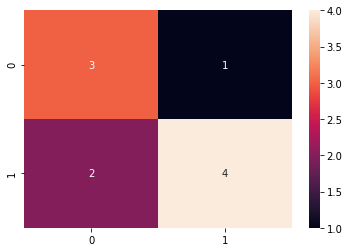

In [57]:
# Now let's plot the confusion matrix
import seaborn as sns

# Calculate confusion matrix
c_matrix = cm(y, (y_hat > 0.5).astype(int))
f = sns.heatmap(c_matrix, annot=True)